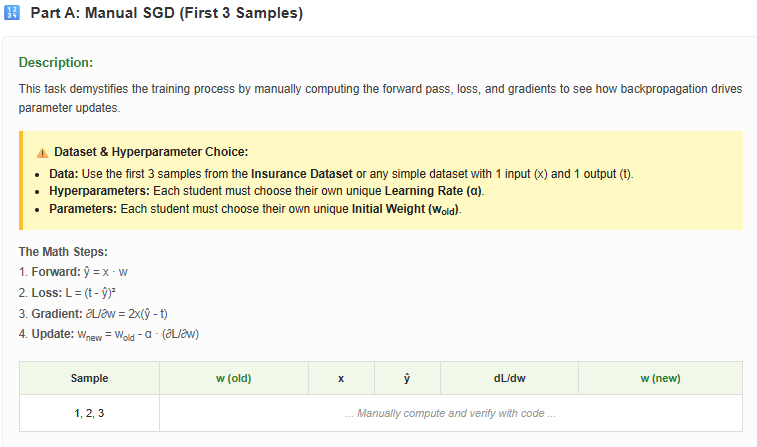

In [ ]:
# import packages for Stochastic Gradient Descent
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading the Insurance Dataset Directly
url = 'https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv'
data = pd.read_csv(url)



In [23]:
# Scaling the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame for easy viewing (Columns are 'X' and 'Y')
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Selecting the first 3 samples
# X is the input, Y is the target (t)
dataset_samples = df_scaled.iloc[:3].values  # Shaping sample 0,1 and 2 into (x, t) pairs

print("Loaded & Scaled Data (First 3 Samples):")
print(df_scaled.iloc[:3])
print("-" * 85)


Loaded & Scaled Data (First 3 Samples):
          X         Y
0  0.870968  0.929654
1  0.153226  0.109427
2  0.104839  0.037186
-------------------------------------------------------------------------------------


In [24]:
# Setup Hyperparameters, choosing learning rate (alpha) =0.1 and initial weight w=0.5
learning_rate = 0.1
w = 0.5

# Printing Table Header
print(f"{'Sample':<8} {'w (old)':<10} {'x':<10} {'ŷ (pred)':<10} {'t (target)':<10} {'dL/dw':<10} {'w (new)':<10}")
print("-" * 85)

# Stochastic Gradient Descent Loop
for i, (x, t) in enumerate(dataset_samples):
    # Forward Pass (y_hat = x * w)
    y_pred = x * w

    # Gradient Calculation (dL/dw = 2x(y_hat - t))
    gradient = 2 * x * (y_pred - t)

    # Update Weight (w_new = w_old - alpha * gradient)
    w_new = w - (learning_rate * gradient)

    # Print the row for this sample
    print(f"{i+1:<8} {w:<10.4f} {x:<10.4f} {y_pred:<10.4f} {t:<10.4f} {gradient:<10.4f} {w_new:<10.4f}")

    # Update the weight for the next iteration
    w = w_new

Sample   w (old)    x          ŷ (pred)   t (target) dL/dw      w (new)   
-------------------------------------------------------------------------------------
1        0.5000     0.8710     0.4355     0.9297     -0.8608    0.5861    
2        0.5861     0.1532     0.0898     0.1094     -0.0060    0.5867    
3        0.5867     0.1048     0.0615     0.0372     0.0051     0.5862    


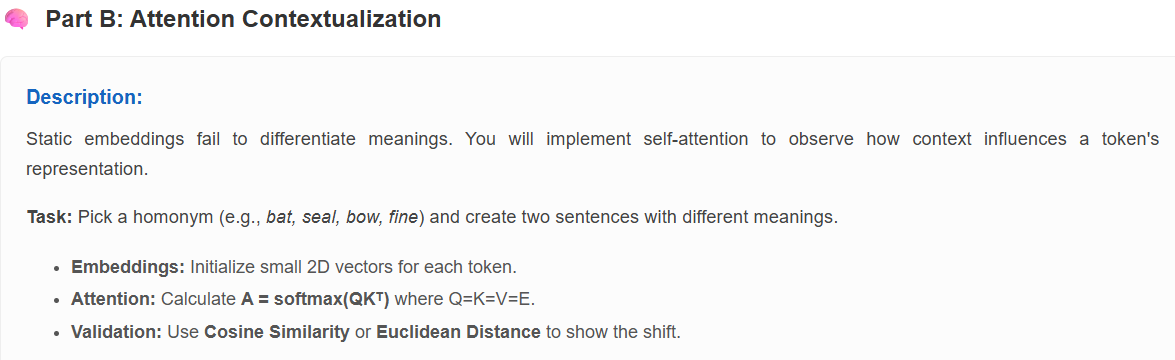

## Scentence example 1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Define Word Embeddings
embeddings = {
    "the":   np.array([0.05, 0.05]), #in both sentences
    "bat":   np.array([0.5, 0.5]), #homonym 
    "flew":  np.array([0.1, 0.4]), #in sentence 1
    "away":  np.array([0.1, 0.4]), #in sentence 1
    "from":  np.array([0.05, 0.05]), #in sentence 1
    "cave":  np.array([0.1, 0.5]), #in sentence 1
    "heavy": np.array([0.6, 0.65]), #in sentence 2
    "is":    np.array([0.05, 0.05]), #in sentence 2
    "made":  np.array([0.6, 0.65]), #in sentence 2
    "of":    np.array([0.1, 0.1]), #in sentence 2
    "wood":  np.array([0.75, 0.1]) #in sentence 2
}

# Define Softmax Function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True)) 
    return e_x / e_x.sum(axis=1, keepdims=True)

# Process Sentence 1: "the bat flew away from the cave"
sentence_1 = ["the", "bat", "flew", "away", "from", "the", "cave"]

# Initialize matrices (Q, K, V are just the embeddings stacked)
# Now this works because all words exist in the dictionary above
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Calculate Attention scores for Sentence 1
attention_scores_1 = Q_1.dot(K_1.T)
attention_weights_1 = softmax(attention_scores_1)
attention_output_1 = attention_weights_1.dot(V_1)

# Process Sentence 2: "the heavy bat is made of wood"
sentence_2 = ["the", "heavy", "bat", "is", "made", "of", "wood"]

Q_2 = np.array([embeddings[word] for word in sentence_2])
K_2 = np.array([embeddings[word] for word in sentence_2])
V_2 = np.array([embeddings[word] for word in sentence_2])

# Calculate Attention scores for Sentence 2
attention_scores_2 = Q_2.dot(K_2.T)
attention_weights_2 = softmax(attention_scores_2)
attention_output_2 = attention_weights_2.dot(V_2)

# Validation
bat_context_1 = attention_output_1[1]
bat_context_2 = attention_output_2[2]

# Cosine Similarity
similarity = cosine_similarity(bat_context_1.reshape(1, -1), 
                               bat_context_2.reshape(1, -1))[0][0]

print(f"Contextualized 'bat' (Sentence 1): {bat_context_1}")
print(f"Contextualized 'bat' (Sentence 2): {bat_context_2}")
print("-" * 50)
print(f"Cosine Similarity: {similarity:.4f}")

Contextualized 'bat' (Sentence 1): [0.15754269 0.30780554]
Contextualized 'bat' (Sentence 2): [0.43754858 0.3577849 ]
--------------------------------------------------
Cosine Similarity: 0.9162


## Scentence example two different embedding values

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Define Word Embeddings
embeddings = {
    "the":   np.array([0.01, 0.01]), #in both sentences
    "bat":   np.array([0.5, 0.5]), #homonym
    "flew":  np.array([0.01, 0.99]), #in sentence 1 (High Y = Vertical pull)
    "away":  np.array([0.05, 0.95]), #in sentence 1 (High Y = Vertical pull)
    "from":  np.array([0.01, 0.01]), #in sentence 1
    "cave":  np.array([0.10, 0.90]), #in sentence 1 (High Y = Vertical pull)
    "heavy": np.array([0.99, 0.01]), #in sentence 2 (High X = Horizontal pull)
    "is":    np.array([0.01, 0.01]), #in sentence 2
    "made":  np.array([0.95, 0.05]), #in sentence 2 (High X = Horizontal pull)
    "of":    np.array([0.01, 0.01]), #in sentence 2
    "wood":  np.array([0.90, 0.10]) #in sentence 2 (High X = Horizontal pull)
}

# Define Softmax Function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True)) 
    return e_x / e_x.sum(axis=1, keepdims=True)

# Process Sentence 1: "the bat flew away from the cave"
sentence_1 = ["the", "bat", "flew", "away", "from", "the", "cave"]

# Initialize matrices (Q, K, V are just the embeddings stacked)
# Now this works because all words exist in the dictionary above
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Calculate Attention scores for Sentence 1
attention_scores_1 = Q_1.dot(K_1.T)
attention_weights_1 = softmax(attention_scores_1)
attention_output_1 = attention_weights_1.dot(V_1)

# Process Sentence 2: "the heavy bat is made of wood"
sentence_2 = ["the", "heavy", "bat", "is", "made", "of", "wood"]

Q_2 = np.array([embeddings[word] for word in sentence_2])
K_2 = np.array([embeddings[word] for word in sentence_2])
V_2 = np.array([embeddings[word] for word in sentence_2])

# Calculate Attention scores for Sentence 2
attention_scores_2 = Q_2.dot(K_2.T)
attention_weights_2 = softmax(attention_scores_2)
attention_output_2 = attention_weights_2.dot(V_2)

# Validation
bat_context_1 = attention_output_1[1]
bat_context_2 = attention_output_2[2]

# Cosine Similarity
similarity = cosine_similarity(bat_context_1.reshape(1, -1), 
                               bat_context_2.reshape(1, -1))[0][0]

print(f"Contextualized 'bat' (Sentence 1): {bat_context_1}")
print(f"Contextualized 'bat' (Sentence 2): {bat_context_2}")
print("-" * 50)
print(f"Cosine Similarity: {similarity:.4f}")

Contextualized 'bat' (Sentence 1): [0.11620295 0.57527377]
Contextualized 'bat' (Sentence 2): [0.57527377 0.11620295]
--------------------------------------------------
Cosine Similarity: 0.3882
